# Image Classification in 5 simple steps.
Using pre-trained DenseNet model in PyTorch 

<p align="center">
  <img alt="A deep DenseNet with three dense blocks." src="https://cloud.githubusercontent.com/assets/8370623/17981496/fa648b32-6ad1-11e6-9625-02fdd72fdcd3.jpg" height="150"/>
  <br/>
  <b>Figure:A deep DenseNet with three dense blocks. </b><br/>
In this tutorial, you will learn how to classify images using a pre-trained DenseNet model in Pytorch.
</p>

In [2]:
# Install libraries if not installed. In google colab ,it is already installed.
!pip install torch torchvision Pillow

### [STEP-1] : Importing all the libraries

In [3]:
import torch                                  #importing torch library
from torchvision import transforms,models     #importing transforms for applying transformations
from PIL import Image                         #Image module helps to load image ,etc.

### [STEP-2] : Downloading an example Image and imagenet output classes

In [4]:
# Download an example image from the pytorch website
!wget "https://github.com/pytorch/hub/raw/master/images/dog.jpg" -O "dog.jpg"

# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2022-05-08 10:12:53--  https://github.com/pytorch/hub/raw/master/images/dog.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg [following]
--2022-05-08 10:12:54--  https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 661378 (646K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 645.88K  --.-KB/s    in 0.03s   

2022-05-08 10:12:54 (18.1 MB/s) - ‘dog.jpg’ saved [661378/661378]

--2022-05-08 10:12:54--  https://raw.githubusercontent.com/pytorch/hub/master/imagen

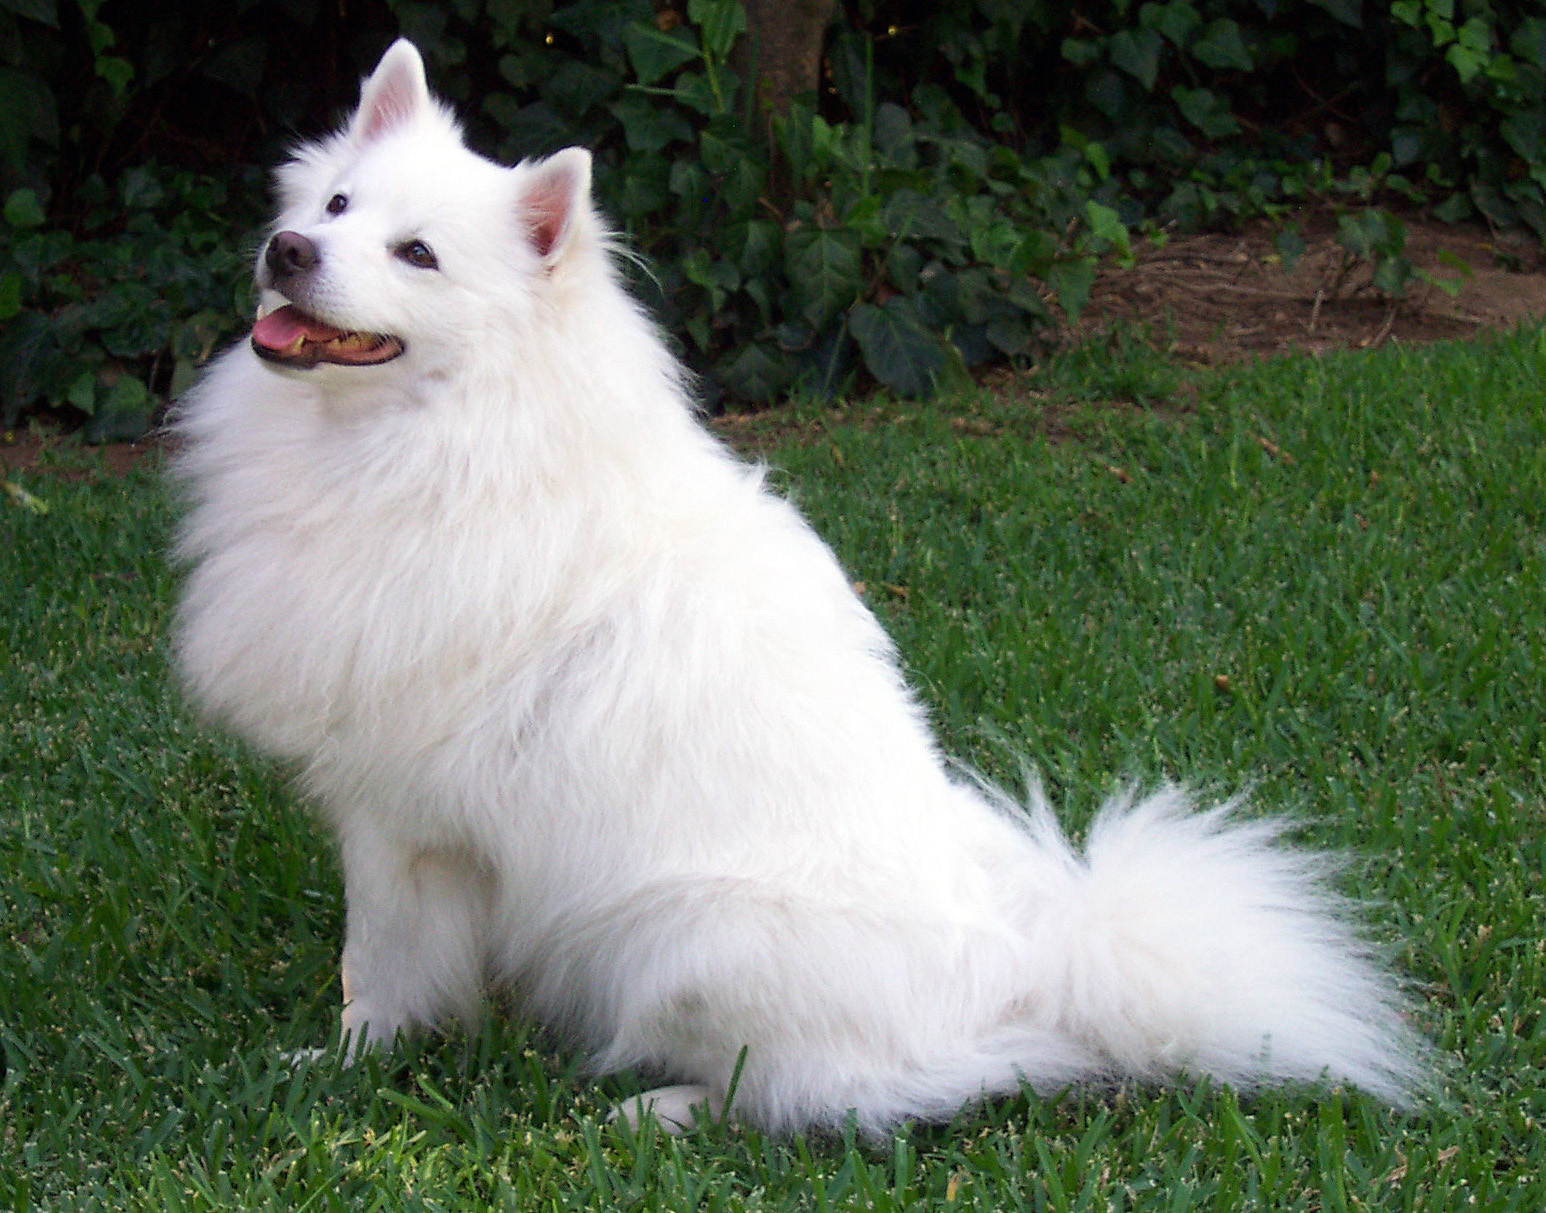

In [5]:
# Display image
Image.open("dog.jpg")

In [6]:
# Read the image classes
with open("imagenet_classes.txt", "r") as f:
    img_classes = [s.strip() for s in f.readlines()]

print("Total Image Classes :{}".format(len(img_classes)))

print(img_classes[:5]) #displaying first five classes

Total Image Classes :1000
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


### [STEP-3] : Applying transformations to image

In [7]:
# transforming input image

filename = "dog.jpg"
input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

### [STEP-4] : Loading densenet model and changing the device

In [8]:
# model 
model = models.densenet121(pretrained=True)
model.eval()  # sets the model in evaluation mode 

# For more info about evaluation:
# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch


# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

### [STEP-5] : Getting final result/output.

In [9]:
with torch.no_grad():
    output = model(input_batch)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output.shape)

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)

torch.Size([1, 1000])


In [10]:
# Show top categories per image
k = 5
top5_prob, top5_catid = torch.topk(probabilities, k)

for id,prob in zip(top5_catid,top5_prob):
    print(f'Image class: {img_classes[id]}\t----- {prob * 100:.4f} %')

Image class: Samoyed	----- 86.7997 %
Image class: white wolf	----- 4.3434 %
Image class: keeshond	----- 2.5546 %
Image class: Arctic fox	----- 2.3647 %
Image class: Pomeranian	----- 1.7686 %


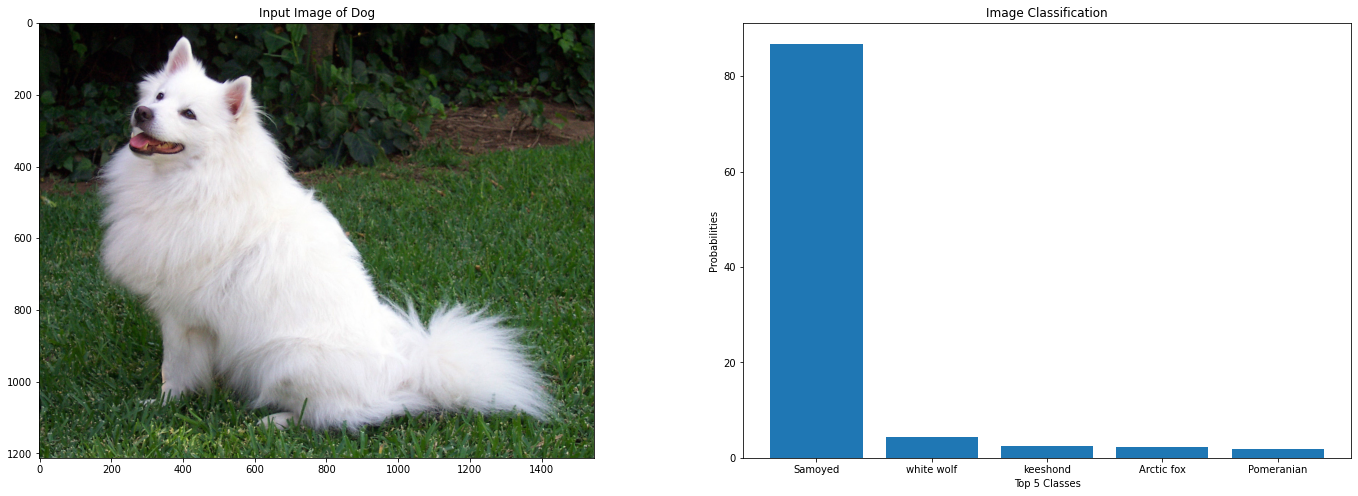

In [25]:
# plot result
import matplotlib.pyplot as plt
 
classes = [img_classes[id] for id in top5_catid]
probabilities = [prob * 100 for prob in top5_prob]
# creating the bar plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24, 8))
ax1.set_title('Input Image of Dog')
ax1.imshow(input_image)

ax2.bar(classes, probabilities)
ax2.set_xlabel("Top 5 Classes")
ax2.set_ylabel("Probabilities")
ax2.set_title("Image Classification")
plt.show()

### References:
[1]: Huang et al. (2017). Densely Connected Convolutional Networks. 
- Paper: https://arxiv.org/abs/1608.06993
- Github: https://github.com/liuzhuang13/DenseNet

[2]: DENSENET By Pytorch Team. 
- Website: https://pytorch.org/hub/pytorch_vision_densenet
